In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
import plotly as py
from sklearn.cluster import KMeans

In [2]:
#loading the data
df = pd.read_csv(r'C:\Users\VeerenTaylor\Downloads\python\jupyter notebook\github\customer data\cdata\Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
#are there any null values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
#list the unique values in each column
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

#What is the distribution of gender

In [7]:
fig = px.bar(df, x=df['Gender'], height=400, width=400, title="Distribution of gender", color='Gender')
fig.show()

#whats the age disbrution of the customers?

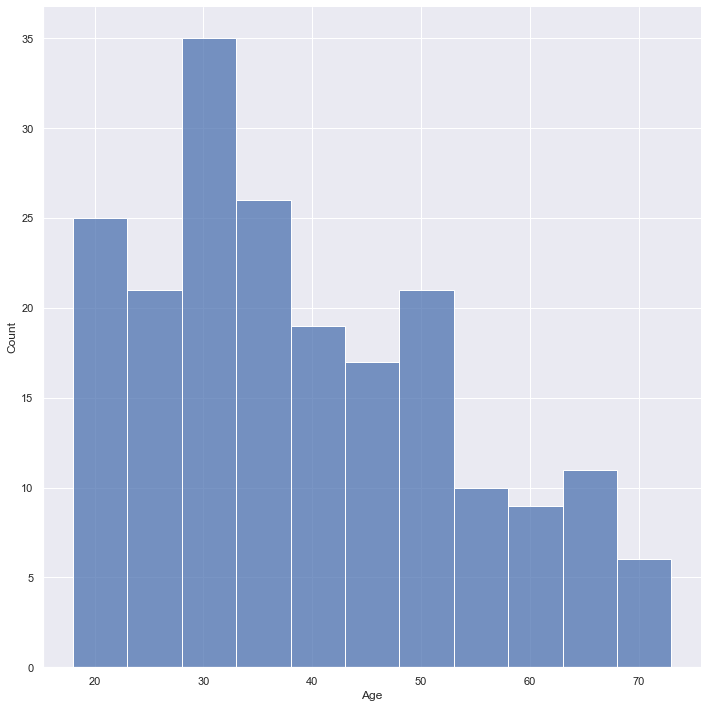

In [8]:
sns.set_theme(style="darkgrid")
sns.displot(df, x='Age', binwidth=5, height=10)

#Check distributions of each variable

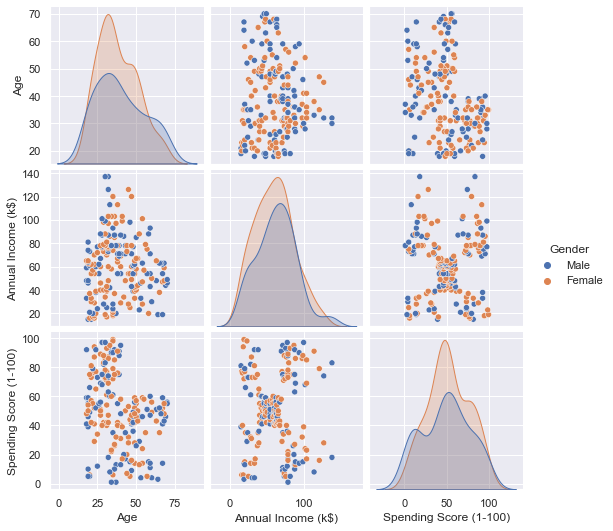

In [9]:
sns.pairplot(df.drop(columns=['CustomerID']), hue='Gender')

Based off the above, we can see some clusters (looks like 'X' shape) when comparing annual income ad spending score.  This can be segmented so marketing can target offers/deals to each customer segment.

# Customer Segmentation via K Means algorithm

In [10]:
X_features=df[['Annual Income (k$)','Spending Score (1-100)']].iloc[:,:].values

inertia = []

for n in range(1,11):
    algorithm = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111, algorithm='lloyd')

    algorithm.fit(X_features)
    inertia.append(algorithm.inertia_)




c:\Users\VeerenTaylor\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\VeerenTaylor\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\VeerenTaylor\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\VeerenTaylor\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when

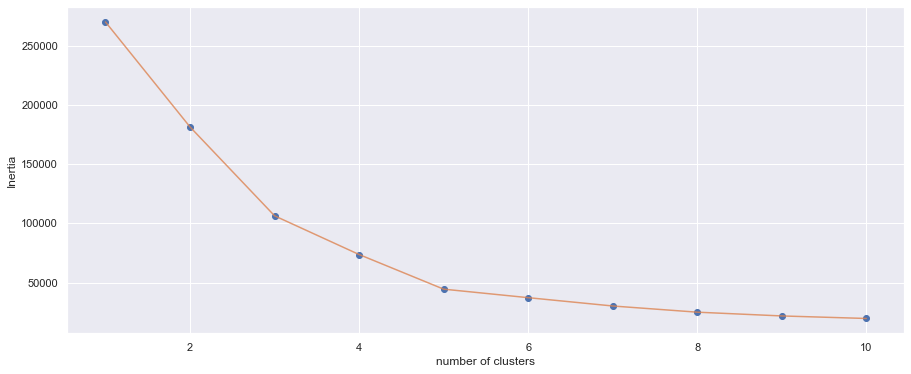

In [11]:
#get value of k by using the elbow method.

plt.figure(1, figsize=(15,6))
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1,11), inertia, '-', alpha=0.8)
plt.xlabel("number of clusters")
plt.ylabel("Inertia")
plt.show()

In [12]:
#based off elbow method, choose n=5 clusters, which make sense visually from charts as data points congregate around certain clusters.  Run algorithm again and create 5 centroids

algorithm = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111, algorithm='lloyd')
algorithm.fit(X_features)
labels2= algorithm.labels_
centroids2= algorithm.cluster_centers_



c:\Users\VeerenTaylor\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [13]:
#generate meshgrid for viualisation
h= 0.02
x_min, x_max = X_features[:,0].min()-1, X_features[:,0].max()+1
y_min, y_max = X_features[:,1].min()-1, X_features[:,1].max()+1



In [14]:
xx,yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max,h))

In [15]:
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

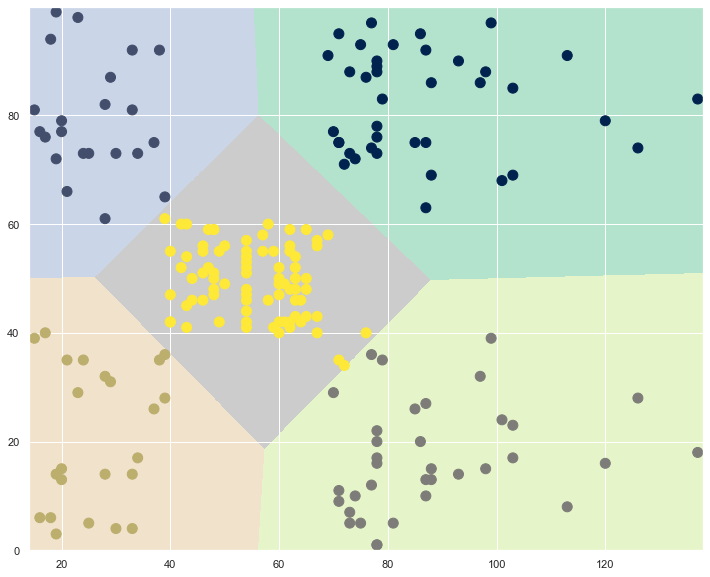

In [16]:
sns.set_theme(style="darkgrid")
plt.figure(1, figsize=(15,10))
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2, interpolation='nearest', extent=(xx.min(),xx.max(),yy.min(), yy.max()), cmap=plt.cm.Pastel2, origin='lower')
plt.scatter(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', c=labels2, s=100, cmap=plt.cm.cividis)


In [17]:
#lets try and include age as another variable and perform K means
X_features3=df[['Annual Income (k$)','Spending Score (1-100)','Age']].iloc[:,:].values

inertia = []

for n in range(1,11):
    algorithm = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111, algorithm='lloyd')

    algorithm.fit(X_features)
    inertia.append(algorithm.inertia_)



c:\Users\VeerenTaylor\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\VeerenTaylor\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\VeerenTaylor\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\VeerenTaylor\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when

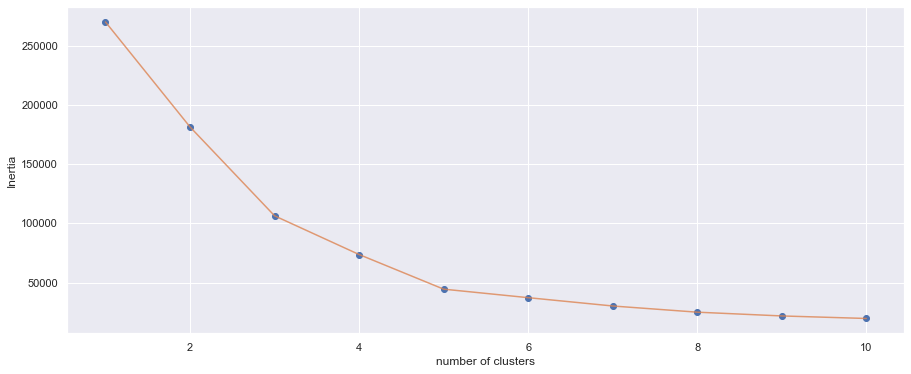

In [18]:
plt.figure(1, figsize=(15,6))
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1,11), inertia, '-', alpha=0.8)
plt.xlabel("number of clusters")
plt.ylabel("Inertia")
plt.show()

In [19]:
algorithm = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111, algorithm='lloyd')
algorithm.fit(X_features3)
labels3= algorithm.labels_
centroids3= algorithm.cluster_centers_

c:\Users\VeerenTaylor\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [22]:
fig = px.scatter_3d(df, x='Age', y='Spending Score (1-100)', z='Annual Income (k$)', color=labels3, height=800, width=800)
fig.update_traces(go.Scatter3d(
    mode='markers',
    marker=dict(
        size=15,
        line=dict(
            width=50
        ),
        opacity=0.85
    )
    )

)


fig.update_layout(go.Layout(title="Clusters"))

py.offline.iplot(fig)
